In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [86]:
data = pd.read_csv("iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


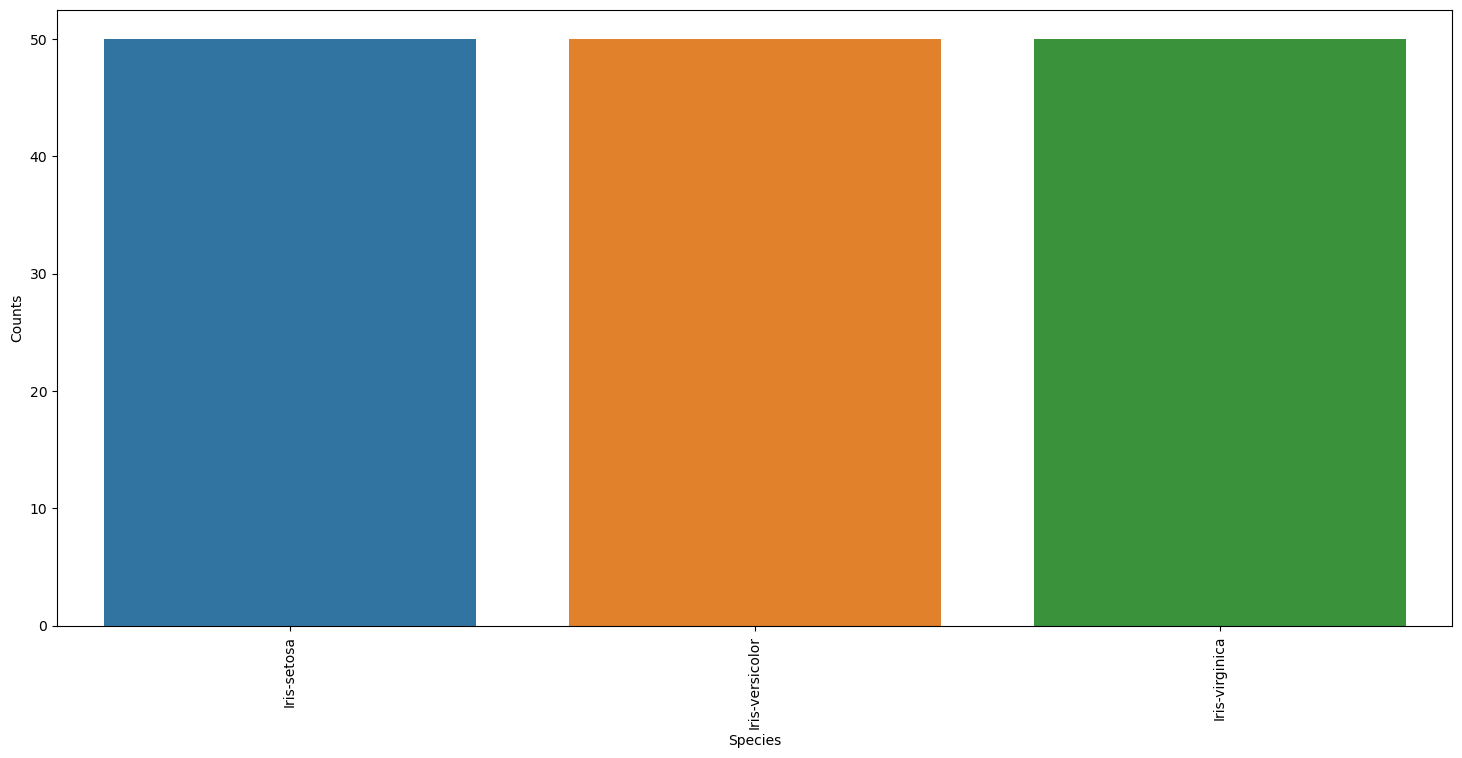

In [88]:
#bar plot showing balance/imbalance

bar_plot = pd.read_csv('iris.csv').dropna(axis = 1)

species_counts = bar_plot["Species"].value_counts()
temp_df = pd.DataFrame({
    "Species" : species_counts.index,
    "Counts" : species_counts.values
})

plt.figure(figsize = (18,8))


#it's plotting the counts against the possible diseases
sns.barplot(x = "Species", y = "Counts", data = temp_df)
plt.xticks(rotation= 90)
plt.show()

#therefore the labels are balanced

In [89]:
# le = LabelEncoder()
# data['Species'] = le.fit_transform(data['Species'])

# data['Species'].unique()

### Features and Labels

In [91]:
features =  data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
label = data['Species']

label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Splitting (test size of 20%)

In [ ]:
#dataset splitting
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 24)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((30, 4), (30,))

### Training and Validation

In [100]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [101]:
prediction = logistic_model.predict(X_test)
pd.DataFrame(prediction, y_test)

#
# logistic_accuracy = accuracy_score(y_test, prediction)*100
# logistic_accuracy

,0
Species,
Iris-virginica,Iris-virginica
Iris-virginica,Iris-virginica
Iris-versicolor,Iris-versicolor
Iris-versicolor,Iris-versicolor
Iris-virginica,Iris-virginica
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-versicolor,Iris-versicolor
Iris-setosa,Iris-setosa


In [98]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#it seems linear models only deals with numbers and can't convert them automatically without being encoded

ValueError: could not convert string to float: 'Iris-versicolor'

In [63]:
prediction = lr_model.predict(X_test)
pd.DataFrame(prediction, y_test)

accuracy = lr_model.score(X_test, y_test)*100
accuracy

96.44655905460692

In [102]:
import pickle
filename = "savedmodel.sav"
pickle.dump(logistic_model, open(filename, 'wb'))

In [103]:
model = pickle.load(open(filename,"rb"))

In [106]:
prediction = model.predict([[6.0,2.2,3.4,0.9]])
print("This should  be a ", prediction)

This should  be a  ['Iris-versicolor']


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
